<a href="https://colab.research.google.com/github/PhaniKris/Python/blob/main/Python_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#PROBLEM STATEMENT
"""
You are the Data Scientist at a telecom company “Neo” whose customers are churning out to its competitors. 
You have to analyse the data of your company and find insights and stop your customers from churning out to other telecom companies. 
"""

'\nYou are the Data Scientist at a telecom company “Neo” whose customers are churning out to its competitors. \nYou have to analyse the data of your company and find insights and stop your customers from churning out to other telecom companies. \n'

In [19]:
#DATA MANIPULATION

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
customer_churn = pd.read_csv('customer_churn.csv')
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
customer_5 = customer_churn.iloc[:, 4]
customer_5.head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [12]:
customer_15 = customer_churn.iloc[:, 14]
customer_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [14]:
senior_male_electronic = customer_churn[(customer_churn['gender'] == "Male") & (customer_churn['SeniorCitizen'] == 1) & (customer_churn['PaymentMethod'] == "Electronic check")]
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [15]:
customer_total_tenure = customer_churn[(customer_churn['tenure'] > 70) | (customer_churn['MonthlyCharges'] > 100)]
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [16]:
two_mail_yes = customer_churn[(customer_churn['Contract'] == "Two year") & (customer_churn['PaymentMethod'] == "Mailed check") & (customer_churn['Churn'] == "Yes")]
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [17]:
customer_333 = customer_churn.sample(n = 333)
customer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6706,7878-RTCZG,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.90,19.9,No
4165,9741-YLNTD,Male,0,No,No,6,Yes,Yes,Fiber optic,No,No,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),87.95,522.35,No
214,2504-DSHIH,Male,1,Yes,No,23,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,86.80,1975.85,No
6513,1794-SWWKL,Male,0,Yes,Yes,15,Yes,Yes,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),59.65,867.1,No
2331,2809-ILCYT,Female,0,Yes,No,25,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,26.80,733.55,No


In [18]:
customer_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
#DATA VISUALISATION

Text(0.5, 1.0, 'Distribution of Internet Service')

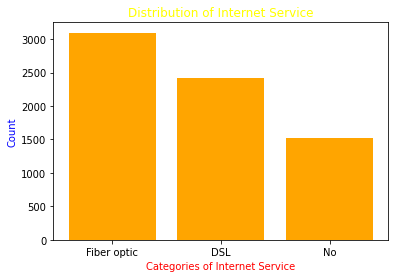

In [30]:
plt.bar(customer_churn['InternetService'].value_counts().keys().tolist(), customer_churn['InternetService'].value_counts().tolist(), color = 'orange')
plt.xlabel("Categories of Internet Service", color = 'red')
plt.ylabel("Count", color = 'blue')
plt.title("Distribution of Internet Service", color = 'yellow')

Text(0.5, 1.0, 'Distribution of Tenure')

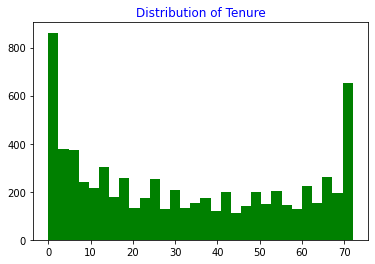

In [29]:
plt.hist(customer_churn['tenure'], bins = 30, color = 'green')
plt.title('Distribution of Tenure', color = 'blue')

Text(0.5, 1.0, 'Tenure vs Monthly Charges')

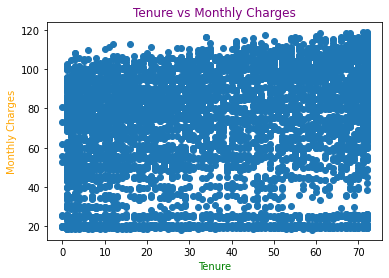

In [37]:
plt.scatter(x = customer_churn['tenure'], y = customer_churn['MonthlyCharges'])
plt.xlabel('Tenure', color = 'green')
plt.ylabel('Monthly Charges', color = 'orange')
plt.title('Tenure vs Monthly Charges', color = 'purple')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


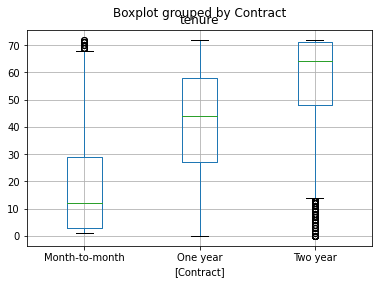

In [39]:
customer_churn.boxplot(column = ['tenure'], by = ['Contract'])

In [ ]:
#MACHINE LEARNING

In [75]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y=customer_churn[['MonthlyCharges']]
x=customer_churn[['tenure']]

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4930, 1), (4930, 1), (2113, 1), (2113, 1))

In [77]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
y_pred = regressor.predict(x_test)
y_pred[:5], y_test[:5]

(array([[60.95089608],
        [72.98096699],
        [59.1903979 ],
        [55.66940154],
        [71.51388517]]),       MonthlyCharges
 2200           58.20
 4627          116.60
 3225           71.95
 2828           20.45
 3768           77.75)

In [79]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

29.394584027273893

In [99]:
x=pd.DataFrame(customer_churn['MonthlyCharges'])
y=customer_churn['Churn']

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.65,random_state=0)

In [101]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
y_pred = logmodel.predict(x_test)

In [104]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_pred,y_test),accuracy_score(y_pred,y_test)

(array([[1815,  651],
        [   0,    0]]), 0.7360097323600974)

In [110]:
x=pd.DataFrame(customer_churn['tenure'])
y=customer_churn['Churn']

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [112]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [114]:
y_pred = classifier.predict(x_test)

In [115]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))   
print(accuracy_score(y_test, y_pred)) 

[[953  72]
 [276 108]]
0.7530163236337828


In [116]:
x=customer_churn[['tenure','MonthlyCharges']]
y=customer_churn['Churn']

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)  

In [118]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=clf.predict(x_test)

In [119]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6763662171753017
